In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [19]:
x = pd.read_csv("C:/Users/USER/Documents/Machine_Learning_Algorithms/Datasets/titanic.csv")
x

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
le=preprocessing.LabelEncoder()
x["Sex"]=le.fit_transform(x["Sex"])
x["Sex"].unique()

array([1, 0])

In [21]:
x.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
x['Age'].fillna(x['Age'].median(), inplace=True)

In [23]:
x = x.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1)

In [24]:
X=x.drop(['Survived'],axis=1)
y=x['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean squared error: 0.13665508450912084
Mean absolute error: 0.2885247469672559
Root Mean squared error: 0.369668884962098


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


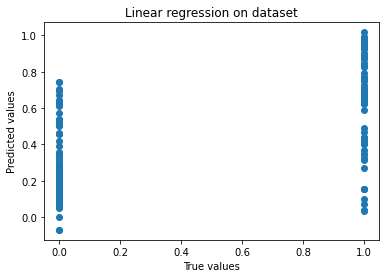

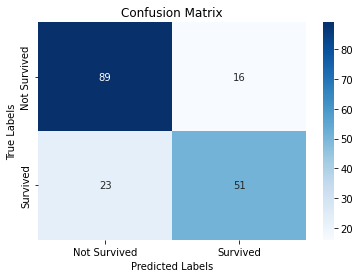

TruePositive: 51
TrueNegative: 89
Accuracy: 0.7821229050279329


In [40]:
#LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
lr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)
lr.fit(X_train, y_train)

# Predict the test set labels
y_pred = lr.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root Mean squared error:", rmse)


import matplotlib.pyplot as plt

# Plot the predicted values against the true values
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Linear regression on dataset")
plt.show()

y_pred_binary = np.round(y_pred)


import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)


# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

from sklearn.metrics import confusion_matrix

# Assuming we have predicted labels y_pred and actual labels y_true
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

# True Positive (TP): Predicted 1 and Actual 1
tp = tp

# True Negative (TN): Predicted 0 and Actual 0
tn = tn

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f'TruePositive: {tp}')
print(f'TrueNegative: {tn}')
print(f'Accuracy: {accuracy}')
